In [1]:
# Importação das Bibliotecas.

from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Versões do Sistema.

%reload_ext watermark
%watermark --iversions --python

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

seaborn   : 0.12.2
matplotlib: 3.7.0
pandas    : 1.5.3
numpy     : 1.23.5



In [3]:
# Lendo CSV e Amostragem de Dados.

df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
# Analisando Quantidade de Linhas, Colunas, Tipos de Dados e NA.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
# Retirando as NA e transformando 'F' para 'Feminino' e 'M' para 'Masculino'.

df.dropna(inplace=True)
df.info()
df['sexo'] = df['sexo'].map({'F': 'Feminino', 'M': 'Masculino'})
df.reset_index(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12466 non-null  int64  
 1   data_ref               12466 non-null  object 
 2   index                  12466 non-null  int64  
 3   sexo                   12466 non-null  object 
 4   posse_de_veiculo       12466 non-null  bool   
 5   posse_de_imovel        12466 non-null  bool   
 6   qtd_filhos             12466 non-null  int64  
 7   tipo_renda             12466 non-null  object 
 8   educacao               12466 non-null  object 
 9   estado_civil           12466 non-null  object 
 10  tipo_residencia        12466 non-null  object 
 11  idade                  12466 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  12466 non-null  float64
 14  mau                    12466 non-null  bool   
 15  re

# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

### 1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

* As variáveis **'posse_de_imovel'** e **'posse_de_veiculo'** são boas preditoras de renda.
  * Verifica-se que:
    * Pessoas que **possuem imoveis**, tem uma **Contagem maior (`8127`)**, porém possui uma **média menor de renda (`R$ 4992.96`)**.
    * Pessoas que **possuem veículos**,tem uma **Contagem menor (`5251`)**, porém possui uma **média maior de renda (`R$ 5082.10`)**.
    * Pessoas que **possuem ambos**,tem uma **Contagem ainda menor (`3433`)**, porém possui uma **média ainda maior de renda (`R$ 5163.21`)**.

renda             
                Contagem        Média
posse_de_imovel                      
True                8127  4992.962267
False               4339  4582.359949

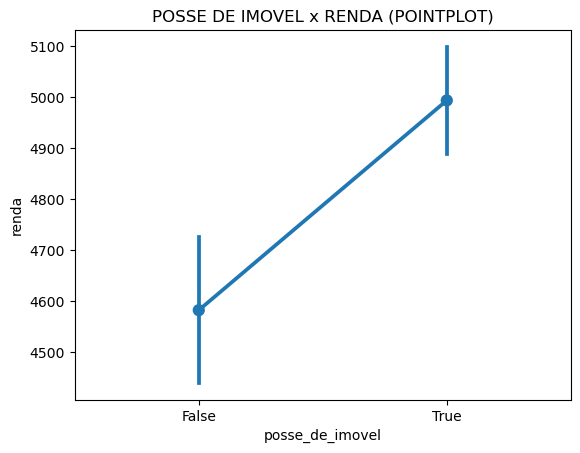

In [6]:
# Gráfico 'posse_de_imovel x renda' e Tabela utilizando .groupby da contagem e média dos dados.

sns.pointplot(x="posse_de_imovel",
              y="renda",
              data=df,
              dodge=True,
              errorbar=('ci', 95))
plt.title("POSSE DE IMOVEL x RENDA (POINTPLOT)")

df.groupby('posse_de_imovel').agg({'renda': [('Contagem', 'count'), ('Média','mean')]}
               ).sort_values(by=('renda', 'Média'), ascending=False)

renda             
                 Contagem        Média
posse_de_veiculo                      
True                 5251  5082.103529
False                7215  4681.155721

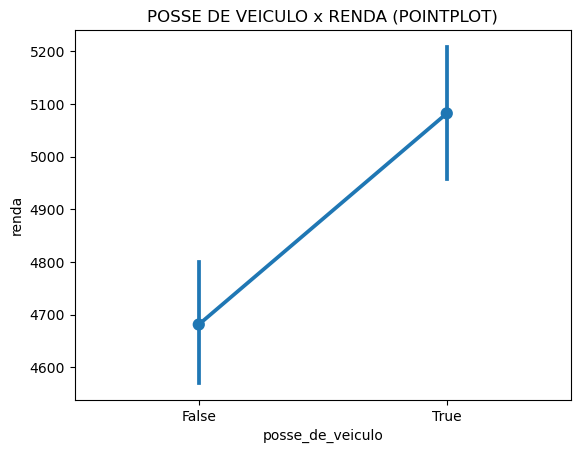

In [7]:
# Gráfico 'posse_de_veiculo x renda' e Tabela utilizando .groupby da contagem e média dos dados.

sns.pointplot(x="posse_de_veiculo",
              y="renda",
              data=df,
              dodge=True,
              errorbar=('ci', 95))
plt.title("POSSE DE VEICULO x RENDA (POINTPLOT)")

df.groupby('posse_de_veiculo').agg({'renda': [('Contagem', 'count'), ('Média','mean')]}
                                  ).sort_values(by=('renda','Média'), ascending=False)

In [8]:
# Criação da Coluna 'posse_de_ambos' para analisar os dados unificados ('posse_de_veiculo' e 'posse_de_imovel').

df['posse_de_ambos'] = np.where((df['posse_de_veiculo'] == True) & (df['posse_de_imovel'] == True),
                                True,
                                False)

renda             
               Contagem        Média
posse_de_ambos                      
True               3433  5163.210344
False              9033  4731.026575

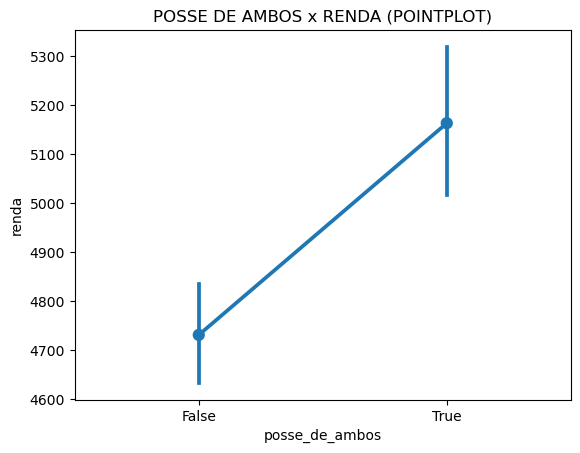

In [9]:
# Gráfico 'posse_de_ambos x renda' e Tabela utilizando .groupby da contagem e média dos dados.

sns.pointplot(x="posse_de_ambos",
              y="renda",
              data=df,
              dodge=True,
              errorbar=('ci', 95))
plt.title("POSSE DE AMBOS x RENDA (POINTPLOT)")

df.groupby('posse_de_ambos').agg({'renda': [('Contagem', 'count'), ('Média','mean')]}
                                ).sort_values(by=('renda','Média'), ascending=False)

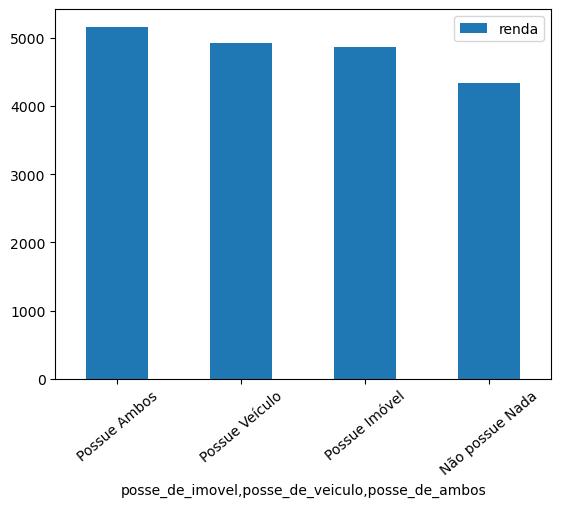

In [10]:
df.groupby(['posse_de_imovel', 'posse_de_veiculo', 'posse_de_ambos'])['renda'].mean().to_frame().sort_values('renda', ascending=False).plot.bar()

plt.xticks([0, 1, 2, 3], ['Possue Ambos', 'Possue Veículo', 'Possue Imóvel', 'Não possue Nada'], rotation=40)

plt.show()